# Soal 1. Menentukan jenis data categorical atau numeric
Jelaskan data kategorikal (kualitatif) dan data numerik (kuantitatif)



Jawab disini:
- Data kategorikal merupakan data yang mencerminkan karakteristik seperti bahasa, jenis kelamin seseorang, warna rambut seseorang, atau nilai numerik bulat yang tidak memiliki makna matematis seperti 1 untuk laki-laki dan 0 untuk perempuan.
- Data numerik adalah data yang diekspresikan dalam bentuk bilangan (yang memiliki makna), bukan merupakan deskripsi karakteristik dari sesuatu.



---



---



---



Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=19Yc404D3U3OPPoUP8J1pXETlTmA4hOOX)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,12/21/2013,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,12/22/2013,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,12/23/2013,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,12/24/2013,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,12/25/2013,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   object
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [3]:
df = df.sample(1000)

<h2>Soal 2. Visualisasi Scatter Plot dengan memiliki missing value </h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' dan 'na' yang dianggap sebagai missing value,  namun data ini tidak bisa di ubah ke bentuk float, maka ubahlah data tersebut menjadi NaN dengan menambahkan argumen na_values=['na', '-'] saat menggunakan atribut pd.read_csv('nama file.csv'. na_values=..]
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

a. Buahlah visualisasi scatter plot menggunakan sample(1000), sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


b. Kemudian bandingkan data visualisasi diatas dengan visualisasi data (sample=1000) setelah handling missing value menggunakan:
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [4]:
missing_values = ['-', 'na']
df=pd.read_csv('austin_weather.csv', na_values=missing_values)
df=df.sample(1000)
df=df[['DewPointAvgF', 'HumidityAvgPercent', 'WindAvgMPH', 'TempAvgF']].astype(float)
df.dtypes

DewPointAvgF          float64
HumidityAvgPercent    float64
WindAvgMPH            float64
TempAvgF              float64
dtype: object

Bagian a: Tanpa handling missing value

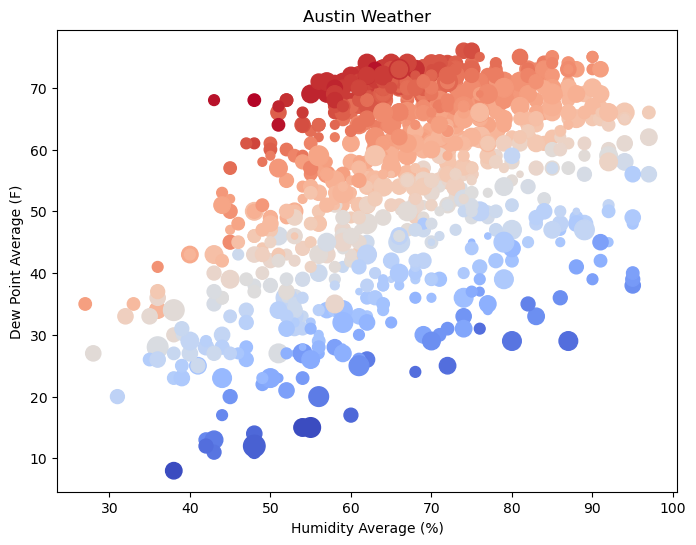

In [5]:
#import seaborn as sns
import matplotlib.pyplot as plt

#sns.scatterplot(data=df, x='Humidity Average (%)', y='Dew Point Average (F)', hue='TempAvgF', sizes=['WindAvgMPH'*20])

plt.figure(figsize=(8,6))
plt.scatter(df['HumidityAvgPercent'], df['DewPointAvgF'], c=df['TempAvgF'], s=df['WindAvgMPH']*20, cmap='coolwarm')
plt.xlabel('Humidity Average (%)')
plt.ylabel('Dew Point Average (F)')
plt.title('Austin Weather')
plt.show()

Bagian b: Dengan handling missing value

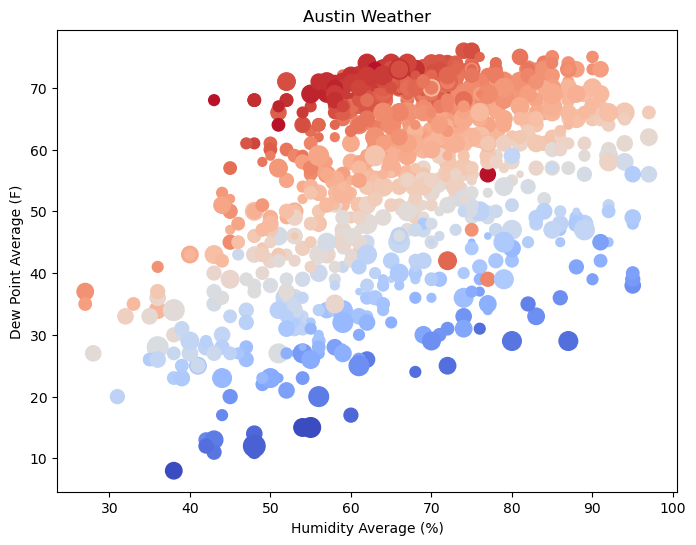

In [6]:
df.fillna(method='ffill', inplace=True)
plt.figure(figsize=(8,6))
plt.scatter(df['HumidityAvgPercent'], df['DewPointAvgF'], c=df['TempAvgF'], s=df['WindAvgMPH']*20, cmap='coolwarm')
plt.xlabel('Humidity Average (%)')
plt.ylabel('Dew Point Average (F)')
plt.title('Austin Weather')
plt.show()

#                     **Expected output**

#                     **Tanpa Handling missing value**

![tanpa handling missing value](https://drive.google.com/uc?id=1FYJkCwAfm8f3jyNdzOnCvp15hS_DixHr)

##                    **Dengan Handling missing value**
![dengan handling missing value](https://drive.google.com/uc?id=1nqZuPdBsqSsOud-_XuBGujDAcJWEEvIr)

In [ ]:
# code here

Analisa :
Ketika tidak dilakukan handling missing value, maka data nilai yang hilang itu dianggap tidak ada dan tidak mempengaruhi hasil observasi yang lain. Sedangkan ketika dilakukan handling missing value, nilai yang hilang menjadi sesuatu yang diperhitungkan dan bisa jadi membuat model pengamatan menjadi lebih valid.

Download [price.csv](https://drive.google.com/uc?export=download&id=1LfuQmLb8AZxAvJzgWJ3u4h49EoTGqO-R)

In [43]:
df2 = pd.read_csv('price.csv')
df2.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


---

<h2>Soal 3. Visualisasi Data with Handling outliers </h2>

Pada tugas kali ini, kita akan melakukan handling outliers. Outliers ditemukan pada kolom 'House_Price' dengan menggunakan boxplot dari library seaborn seperti gambar berikut: 


![boxplot1](https://drive.google.com/uc?id=1y2jRwf8zRPXQtSBkmjJLcqUm4l6DR7d9)


Dengan menggunakan Interquartile range, kita bisa temukan nilai data outliers dan meremove data outlier tersebut. 

*   Tentukan nilai batas atas dan batas bawah dari Interquartile range tersebut
*   Remove data outliers tersebut menggunakan batas atas dan batas bawah
*   Visualisasikan hasil data yang sudah d remove outliers seperti expected berikut:







**EXPECTED OUTPUT:**

Batas bawah & batas atas:

871625.0 10976625.0

Visualisasi boxplot:

![boxplot2](https://drive.google.com/uc?id=1qZc-lEa5FUzSQ_cyt4_GJQ0TZ8c6WjHX)





- Batas bawah dan batas atas dari Interquartile range tersebut

In [44]:
Q1=df2['House_Price'].quantile(0.25)
Q3=df2['House_Price'].quantile(0.75)
IQR=Q3-Q1
Lb=Q1-IQR*1.5
Ub=Q3+IQR*1.5
print('Batas bawah: ', Lb)
print('Batas atas: ', Ub)

Batas bawah:  871625.0
Batas atas:  10976625.0


- Remove data outliers

In [45]:
df3=df2[(df2['House_Price']>Lb) & (df2['House_Price']<Ub)]

<Axes: >

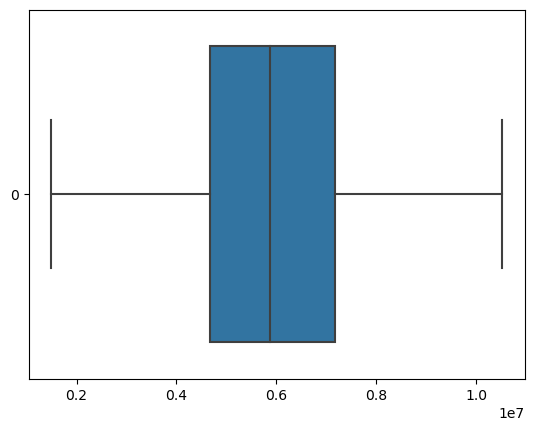

In [47]:
#Code here
import seaborn as sns
sns.boxplot(df3['House_Price'], orient='h')